## Healthcare data analysis and predict the chances of having a favourable outcome

In [1]:
#load the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

In [4]:
#loading all the datasets
data_dictionary = pd.read_excel("Data_Dictionary.xlsx")
first_health_camp = pd.read_csv("First_Health_Camp_Attended.csv")
health_camp_details = pd.read_csv("Health_Camp_Detail.csv")
patient_profile = pd.read_csv("Patient_Profile.csv")
second_health_camp = pd.read_csv("Second_Health_Camp_Attended.csv")
third_health_camp = pd.read_csv("Third_Health_Camp_Attended.csv")
train = pd.read_csv("Train.csv")
test = pd.read_csv("test.csv")

In [5]:
data_dictionary.head()

,Details of the Files
0,Health_Camp_Detail.csv – File containing Healt...
1,Train.csv – File containing registration detai...
2,Patient_Profile.csv – This file contains Patie...
3,First_Health_Camp_Attended.csv – This file con...
4,Second_Health_Camp_Attended.csv - This file co...


In [6]:
#data on the first type of health camp that collects donations and provides a rapid health score
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [7]:
#data on the second type of health camp that provides a rapid health score
second_health_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [8]:
#data on the third type of health camp that provides information of health camp to provides information about several health issues through various awareness stalls.
third_health_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [9]:
#patient data
patient_profile.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [10]:
#health camp data
health_camp_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [11]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [12]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [14]:
#looking for null values
patient_profile.isnull().sum()

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

23384 city values and 34793 employee category values are missing

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

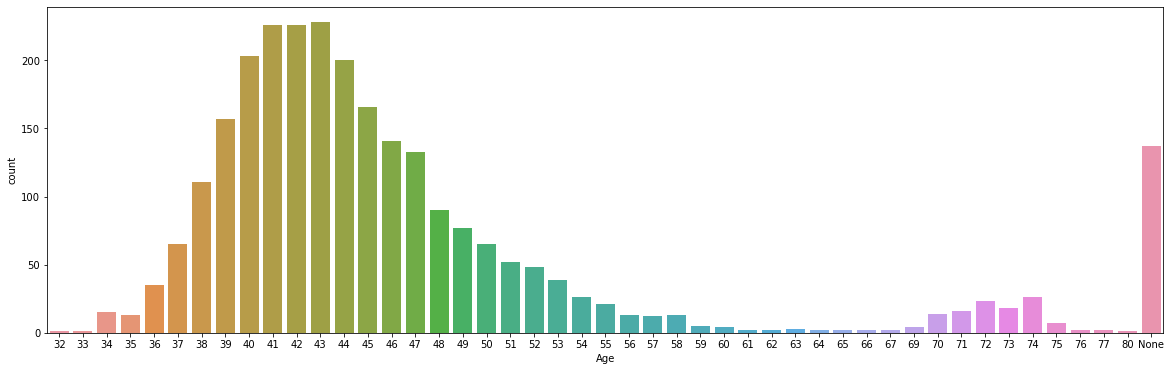

In [15]:
#studying the distribution of age of most active participants in the camp
plt.figure(figsize=(20,6))
sns.countplot(patient_profile.dropna().sort_values("Age").Age)

Patients age have ranged from 32 to 80 in these medical camps. Maximum participatory patients are in the age group of 41-43. Younger people tend to be more active in these medical camps. 

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

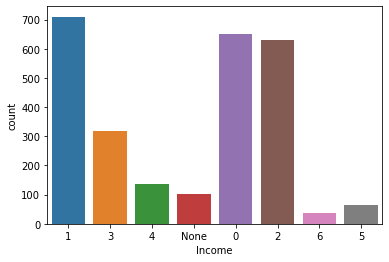

In [17]:
#studying the distribution of patients across cities
sns.countplot(patient_profile.dropna().Income)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employer_Category', ylabel='count'>

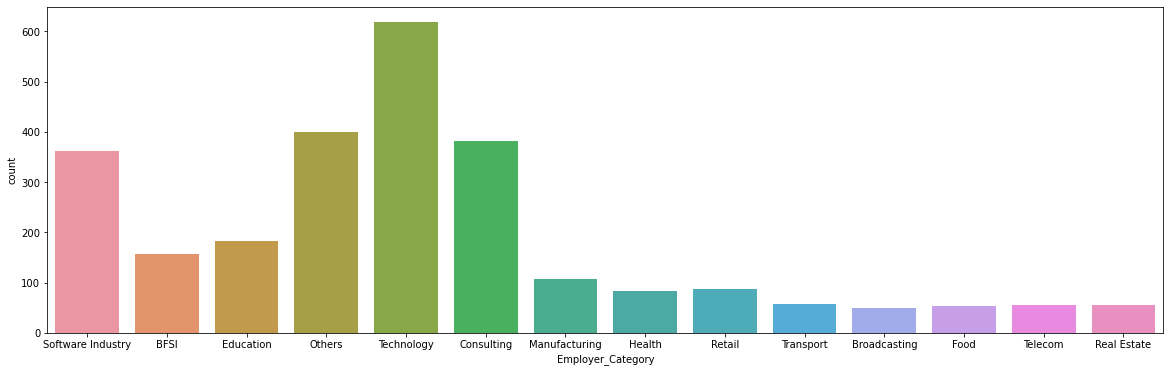

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(patient_profile.dropna().Employer_Category)

Most active patients are from software industry, technology, consulting, and others. They are probably more health conscious. 

In [31]:
#merging dataframes
merged_details = pd.merge(right = patient_profile, left = first_health_camp, on="Patient_ID")
merged_details = merged_details.merge(health_camp_details, on = "Health_Camp_ID" )
merged_details = merged_details.merge(second_health_camp, on="Patient_ID")
merged_details = merged_details.merge( third_health_camp ,on = "Patient_ID")

In [32]:
merged_details.head()

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Unnamed: 4,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,...,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6536,0.673181,6578,5,3
1,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6536,0.673181,6527,2,1
2,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6555,0.615827,6578,5,3
3,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6555,0.615827,6527,2,1
4,494977,6585,60,0.733990,NaN,1,1,1,0,2,...,22-Nov-03,05-Dec-03,First,E,2,6536,0.673181,6578,5,3


In [24]:
merged_details.columns

Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
      dtype='object')

In [26]:
merged_details.shape

(5422, 25)

In [27]:
merged_details.isna().sum() 

Patient_ID                      0
Health_Camp_ID_x                0
Donation                        0
Health_Score                    0
Unnamed: 4                   5422
Online_Follower                 0
LinkedIn_Shared                 0
Twitter_Shared                  0
Facebook_Shared                 0
Income                          0
Education_Score                 0
Age                             0
First_Interaction               0
City_Type                     640
Employer_Category            2042
Camp_Start_Date                 0
Camp_End_Date                   0
Category1                       0
Category2                       0
Category3                       0
Health_Camp_ID_y                0
Health Score                    0
Health_Camp_ID                  0
Number_of_stall_visited         0
Last_Stall_Visited_Number       0
dtype: int64

In [28]:
#percentage of missing values in each column
missing_percent = merged_details.isna().sum().sort_values(ascending=False)/len(merged_details)
missing_percent*100 #%

Unnamed: 4                   100.000000
Employer_Category             37.661380
City_Type                     11.803762
Patient_ID                     0.000000
Number_of_stall_visited        0.000000
Health_Camp_ID                 0.000000
Health Score                   0.000000
Health_Camp_ID_y               0.000000
Category3                      0.000000
Category2                      0.000000
Category1                      0.000000
Camp_End_Date                  0.000000
Camp_Start_Date                0.000000
First_Interaction              0.000000
Health_Camp_ID_x               0.000000
Age                            0.000000
Education_Score                0.000000
Income                         0.000000
Facebook_Shared                0.000000
Twitter_Shared                 0.000000
LinkedIn_Shared                0.000000
Online_Follower                0.000000
Health_Score                   0.000000
Donation                       0.000000
Last_Stall_Visited_Number      0.000000


In [33]:
merged_details2 = merged_details.drop('Unnamed: 4', axis=1, inplace=True)

In [34]:
#we're choosing the important columns that may give us meaningful results
imp_col = ['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',  'Income', 'Camp_Start_Date', 'Camp_End_Date', 'Health Score', 'Number_of_stall_visited']
merged_details[imp_col]

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Income,Camp_Start_Date,Camp_End_Date,Health Score,Number_of_stall_visited
0,494977,6578,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,5
1,494977,6527,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,2
2,494977,6578,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,5
3,494977,6527,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,2
4,494977,6578,60,0.733990,2,22-Nov-03,05-Dec-03,0.673181,5
...,...,...,...,...,...,...,...,...,...
5417,499996,6527,20,0.537037,None,13-May-05,21-May-05,0.586493,6
5418,495949,6527,30,0.037037,None,13-May-05,21-May-05,0.753930,3
5419,520328,6527,20,0.092593,None,13-May-05,21-May-05,0.552962,6
5420,517824,6578,20,0.648148,None,13-May-05,21-May-05,0.610190,3


In [36]:
merged_details['Health_Score_Main'] = (merged_details['Health Score'] + merged_details['Health_Score'])
merged_details.head()


,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,...,Camp_End_Date,Category1,Category2,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number,Health_Score_Main
0,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6536,0.673181,6578,5,3,0.770742
1,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6536,0.673181,6527,2,1,0.770742
2,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6555,0.615827,6578,5,3,0.713388
3,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6555,0.615827,6527,2,1,0.713388
4,494977,6585,60,0.733990,1,1,1,0,2,68,...,05-Dec-03,First,E,2,6536,0.673181,6578,5,3,1.407171


In [37]:
merged_details['Health_Score_Main'].describe()

count    5422.000000
mean        1.132249
std         0.407618
min         0.077326
25%         0.844802
50%         1.147704
75%         1.432447
max         1.985676
Name: Health_Score_Main, dtype: float64

In [39]:
merged_details['Donation'].describe()

count    5422.000000
mean       32.880856
std        25.985824
min        10.000000
25%        20.000000
50%        30.000000
75%        40.000000
max       280.000000
Name: Donation, dtype: float64

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Donation', ylabel='Density'>

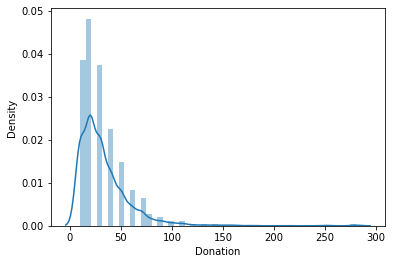

In [38]:
sns.distplot(merged_details.Donation)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Donation', ylabel='count'>

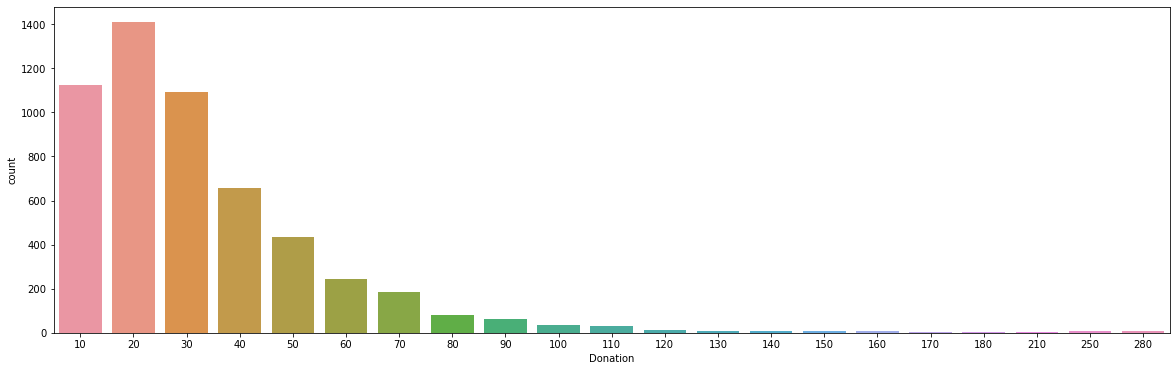

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(merged_details.Donation)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health_Score_Main', ylabel='Density'>

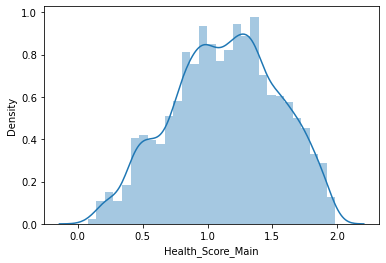

In [42]:
sns.distplot(merged_details.Health_Score_Main)

<AxesSubplot:xlabel='Donation', ylabel='Health_Score_Main'>

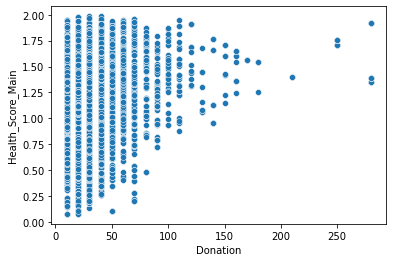

In [43]:
sns.scatterplot(x="Donation",y="Health_Score_Main",data = merged_details)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Health_Camp_ID', ylabel='count'>

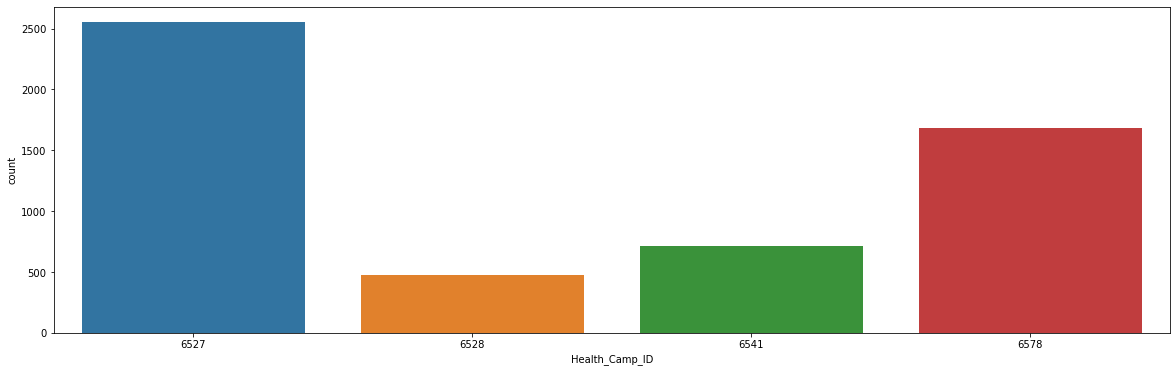

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(merged_details.Health_Camp_ID)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

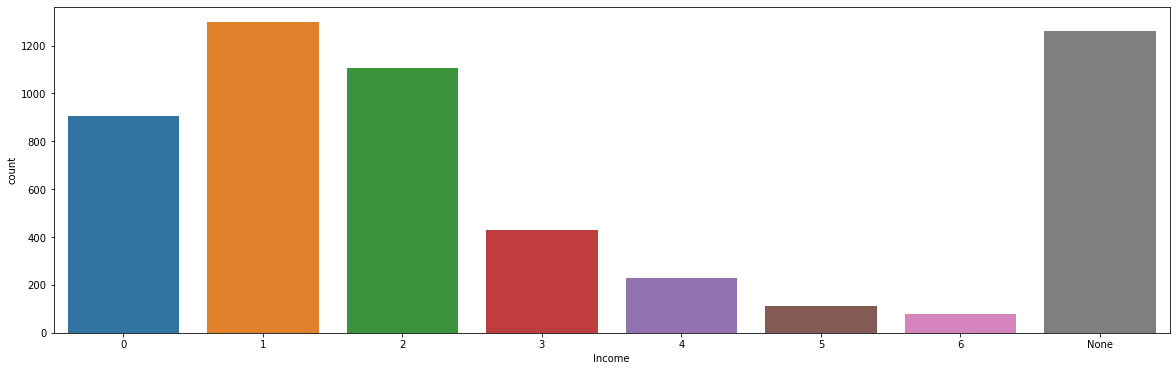

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(merged_details.Income.sort_values())

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(merged_details.Education_Score)

TypeError: cannot convert the series to <class 'int'>

<Figure size 1440x432 with 0 Axes>

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health_Score_Main', ylabel='Density'>

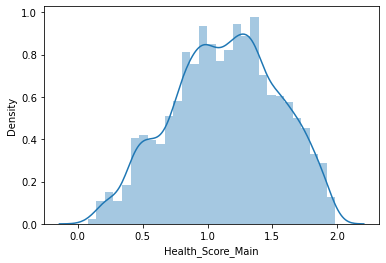

In [48]:
sns.distplot(merged_details.Health_Score_Main)

In [50]:
imp_cols_pred = ['Donation', 'Health_Score_Main',  'Income', 'Number_of_stall_visited', 'Employer_Category', 'City_Type']
useful_details = merged_details[imp_cols_pred]
useful_details.head()

,Donation,Health_Score_Main,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H


In [54]:
Employer = useful_details['Employer_Category'].mode()
Employer

0    Technology
dtype: object

In [55]:
City = useful_details['City_Type'].mode()
City

0    H
dtype: object

In [56]:
useful_details.City_Type.fillna('H', inplace=True)
useful_details.Employer_Category.fillna('Technology', inplace = True)
useful_details.head()

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Donation,Health_Score_Main,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H


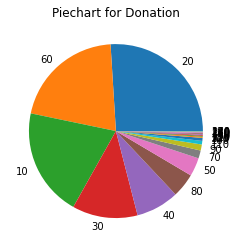

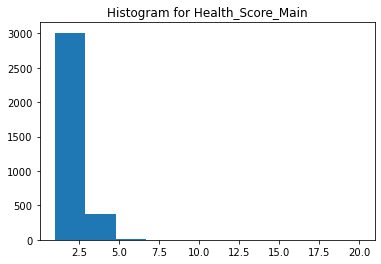

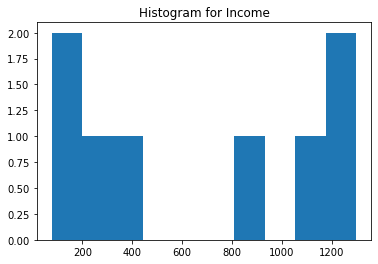

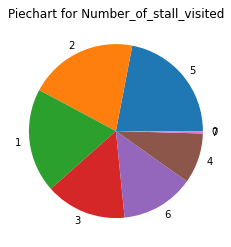

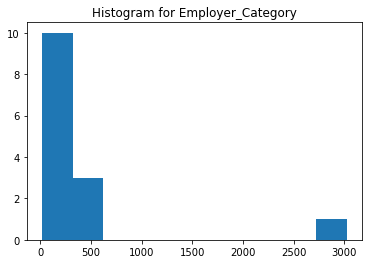

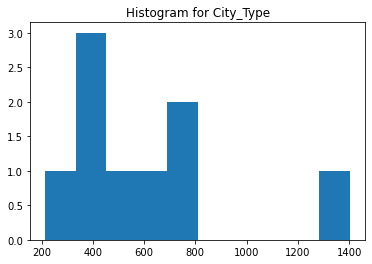

In [57]:
for col in useful_details.columns:
    if useful_details[col].dtype == 'int64':
        plt.pie(useful_details[col].value_counts(), labels=useful_details[col].unique())
        plt.title('Piechart for {}'.format(col))
        plt.show()
    else:
        plt.hist(useful_details[col].value_counts())
        plt.title('Histogram for {}'.format(col))
        plt.show(); 

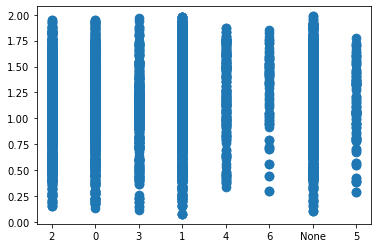

In [61]:
plt.scatter(x=useful_details['Income'], y=useful_details['Health_Score_Main'], s = 75)

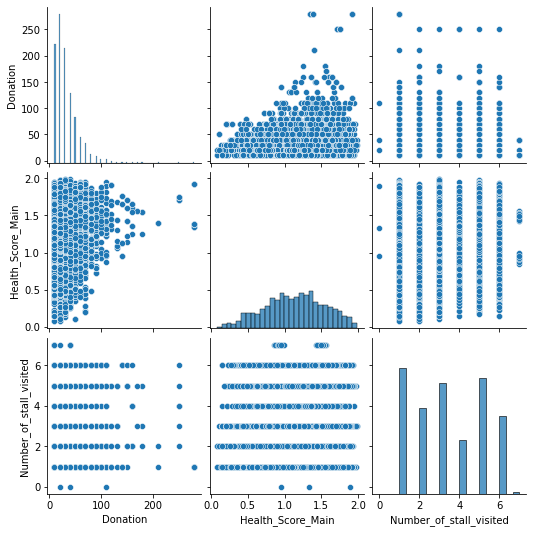

In [62]:
sns.pairplot(useful_details)

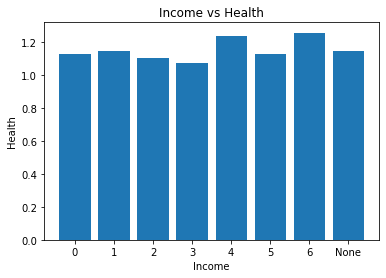

In [70]:
df_new1=pd.DataFrame()


df_new1['Mean_Health']=useful_details.groupby('Income')['Health_Score_Main'].mean()
df_new1.index

#plotting 
plt.bar(df_new1.index,df_new1['Mean_Health'])
plt.title('Income vs Health')
plt.xlabel('Income')
plt.ylabel('Health')
plt.show()

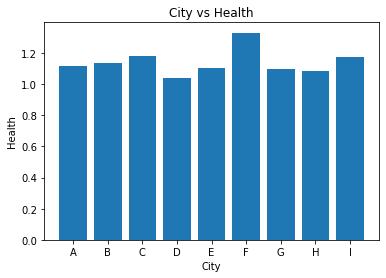

In [69]:
df_new1=pd.DataFrame()


df_new1['Mean_Health']=useful_details.groupby('City_Type')['Health_Score_Main'].mean()
df_new1.index

#plotting 
plt.bar(df_new1.index,df_new1['Mean_Health'])
plt.title('City vs Health')
plt.xlabel('City')
plt.ylabel('Health')
plt.show()

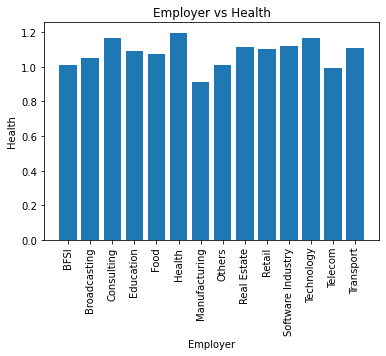

In [68]:
df_new1=pd.DataFrame()


df_new1['Mean_Health']=useful_details.groupby('Employer_Category')['Health_Score_Main'].mean()
df_new1.index

#plotting 
plt.bar(df_new1.index,df_new1['Mean_Health'])
plt.title('Employer vs Health')
plt.xlabel('Employer')
plt.ylabel('Health')
plt.xticks(rotation=90)
plt.show()

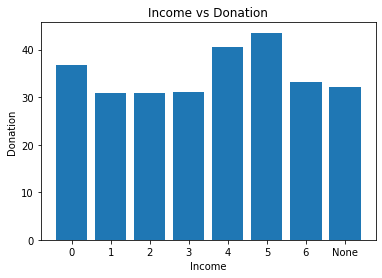

In [71]:
df_new1=pd.DataFrame()


df_new1['Mean_Donation']=useful_details.groupby('Income')['Donation'].mean()
df_new1.index

#plotting 
plt.bar(df_new1.index,df_new1['Mean_Donation'])
plt.title('Income vs Donation')
plt.xlabel('Income')
plt.ylabel('Donation')
plt.show()

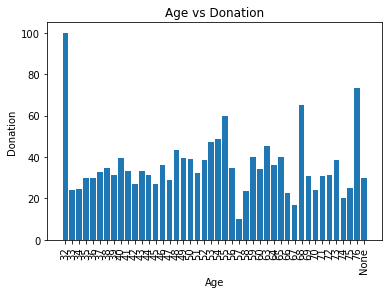

In [74]:
df_new1=pd.DataFrame()


df_new1['Mean_Donation']=merged_details.groupby('Age')['Donation'].mean()
df_new1.index

#plotting 
plt.bar(df_new1.index,df_new1['Mean_Donation'])
plt.title('Age vs Donation')
plt.xlabel('Age')
plt.xticks(rotation = 90)
plt.ylabel('Donation')
plt.show()

In [91]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_merged_cols = merged_details.select_dtypes(include=numerics) 
numerical_merged_cols
x = numerical_merged_cols.iloc[:,:-1]
y = numerical_merged_cols.Health_Score_Main
X =pd.get_dummies(x, prefix=None, prefix_sep="_",drop_first=False)
Y =pd.get_dummies(y, prefix=None, prefix_sep="_",drop_first=False)
X.head()

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,494977,6560,20,0.097561,1,1,1,0,2,6536,0.673181,6578,5,3
1,494977,6560,20,0.097561,1,1,1,0,2,6536,0.673181,6527,2,1
2,494977,6560,20,0.097561,1,1,1,0,2,6555,0.615827,6578,5,3
3,494977,6560,20,0.097561,1,1,1,0,2,6555,0.615827,6527,2,1
4,494977,6585,60,0.733990,1,1,1,0,2,6536,0.673181,6578,5,3


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state =23)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(x_train,y_train)
rsq=model.score(x_train,y_train)
rsq

1.0

In [100]:
from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
yhat

array([0.74840816, 1.57514408, 1.10050527, ..., 0.9295685 , 1.59953141,
       1.77049671])